In [1]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline


In [2]:
stats_file_name = 'stats_10_3.dat'

In [3]:
stats = pd.read_csv(stats_file_name)

In [4]:
stats['sample'] = range(stats['count'].size)
stats['sample'] = stats['sample'] + 1

In [5]:
stats.describe()

,count,duration,slack,delay,tpm,ttpm,update_xacts,update_duration,average_service_delay_ms,degree_timing_violation,smoth_degree_timing_violation,p_ext,sample
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,372.333333,51554.761905,1407.380952,50962.142857,67.428571,64.571429,8641.952381,34952.619048,270.837143,0.125714,0.125238,1.063810,11.000000
std,218.163089,5286.254164,60.851850,5264.724820,10.979852,17.350998,6306.399983,12266.266732,313.931466,0.387267,0.225269,0.026547,6.204837
min,22.000000,28485.000000,1314.000000,27985.000000,22.000000,3.000000,0.000000,0.000000,72.720000,0.000000,0.000000,1.000000,1.000000
25%,196.000000,52650.000000,1355.000000,52111.000000,69.000000,69.000000,3027.000000,27402.000000,96.450000,0.000000,0.000000,1.060000,6.000000
50%,373.000000,52709.000000,1402.000000,52111.000000,71.000000,71.000000,8287.000000,36011.000000,141.310000,0.000000,0.010000,1.080000,11.000000
75%,547.000000,52756.000000,1461.000000,52111.000000,71.000000,71.000000,13772.000000,44054.000000,268.620000,0.000000,0.110000,1.080000,16.000000
max,726.000000,52797.000000,1500.000000,52111.000000,73.000000,73.000000,19248.000000,52063.000000,1294.770000,1.590000,0.730000,1.080000,21.000000


In [6]:
plot_style='o-'

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

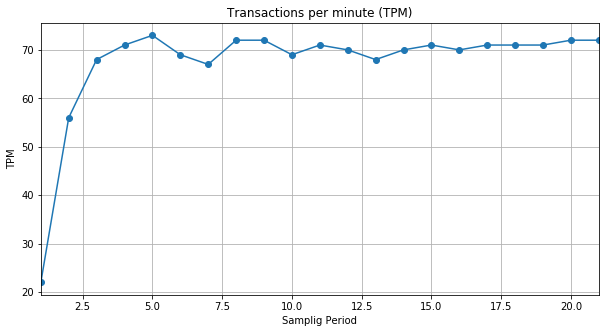

In [104]:
pp.figure(figsize=(10, 5))
#stats['tpm'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['tpm'], kind='line', style=plot_style,figsize=(10, 5), grid=True, legend=False)
pp.title('Transactions per minute (TPM)')
pp.ylabel('TPM')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

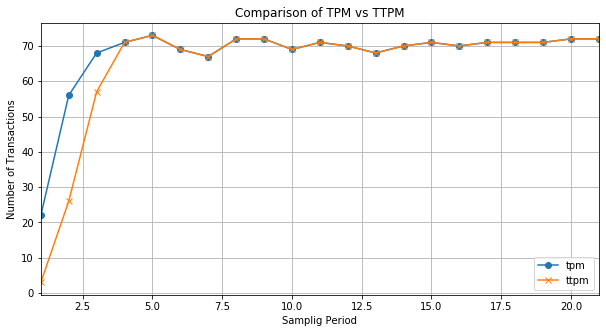

In [128]:
stats.plot('sample',  ['tpm','ttpm'], kind='line', style=['o-','x-'], figsize=(10, 5), grid=True,)
pp.title('Comparison of TPM vs TTPM')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

In [9]:
stats['avg_response_time'] = stats['duration']/stats['count']

In [135]:
stats['avg_response_time'].describe()

count      21.000000
mean      270.836629
std       313.932036
min        72.723140
25%        96.446069
50%       141.310992
75%       268.622449
max      1294.772727
Name: avg_response_time, dtype: float64

<Figure size 720x360 with 0 Axes>

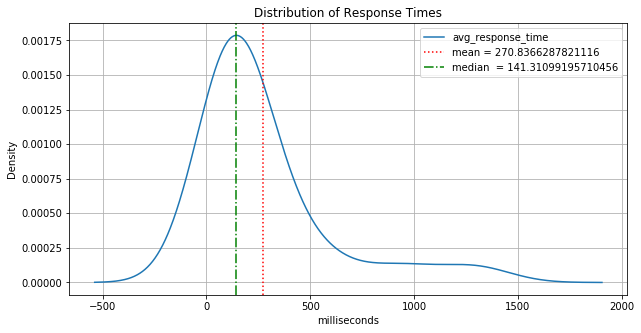

In [134]:
pp.figure(figsize=(10, 5))
#myplot=stats['avg_response_time'].plot.density(bw_method=0.3)
myplot=stats.plot('sample', ['avg_response_time'], kind='density',figsize=(10, 5), grid=True, legend=False)
myplot.set_title('Distribution of Response Times')
myplot.set_xlabel('milliseconds')

mean_label = 'mean = ' + str(stats['avg_response_time'].mean())
median_label = 'median  = ' + str(stats['avg_response_time'].median())
myplot.axvline(x=stats['avg_response_time'].mean(), linestyle=':', label= mean_label, color='r')
myplot.axvline(x=stats['avg_response_time'].median(), linestyle='-.', label=median_label, color='g')
pp.legend()

Text(0, 0.5, 'milliseconds')

<Figure size 720x360 with 0 Axes>

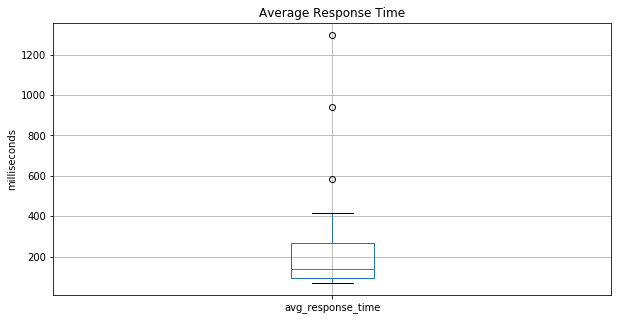

In [107]:
pp.figure(figsize=(10, 5))
#boxplot = stats['avg_response_time'].plot(kind='box',ylim=(9500,9750),figsize=(10, 5))
myplot=stats.plot('sample', ['avg_response_time'], kind='box',figsize=(10, 5), grid=True,)
pp.title('Average Response Time')
pp.ylabel('milliseconds')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

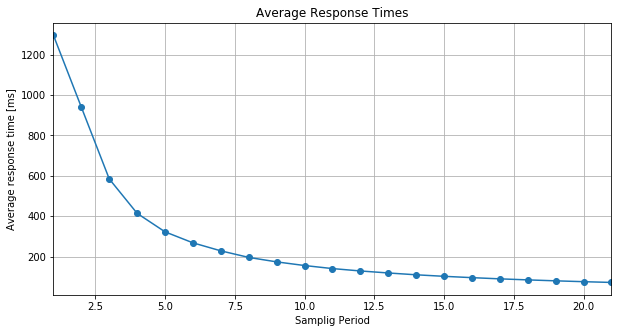

In [109]:
pp.figure(figsize=(10, 5))
#myplot=stats['avg_response_time'].plot(kind='line', style=plot_style, ylim=(0,15000))
myplot=stats.plot('sample', ['avg_response_time'], kind='line', legend=False, style=plot_style,figsize=(10, 5), grid=True)
pp.title('Average Response Times')
pp.ylabel('Average response time [ms]')
pp.xlabel('Samplig Period')

In [136]:
stats['average_service_delay_ms'].describe()

count      21.000000
mean      270.837143
std       313.931466
min        72.720000
25%        96.450000
50%       141.310000
75%       268.620000
max      1294.770000
Name: average_service_delay_ms, dtype: float64

<Figure size 720x360 with 0 Axes>

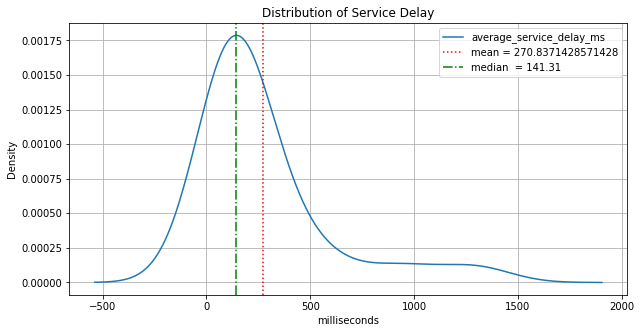

In [133]:
pp.figure(figsize=(10, 5))
myplot=stats.plot('sample', ['average_service_delay_ms'], kind='density',figsize=(10, 5), grid=True)
#myplot=stats['average_service_delay_ms'].plot.density(bw_method=0.3)
myplot.set_title('Distribution of Service Delay')
myplot.set_xlabel('milliseconds')
mean_label = 'mean = ' + str(stats['average_service_delay_ms'].mean())
median_label = 'median  = ' + str(stats['average_service_delay_ms'].median())
myplot.axvline(x=stats['average_service_delay_ms'].mean(), linestyle=':', label= mean_label, color='r')
myplot.axvline(x=stats['average_service_delay_ms'].median(), linestyle='-.', label=median_label, color='g')
pp.legend()

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

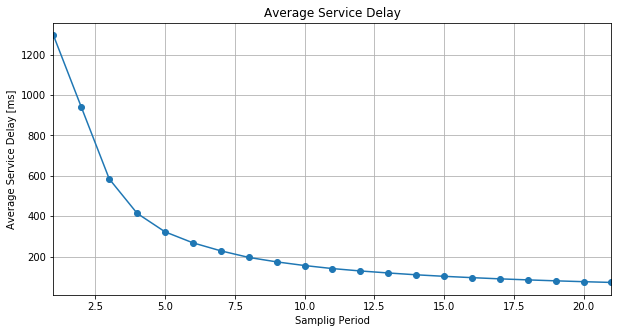

In [112]:
pp.figure(figsize=(10, 5))
#myplot=stats['average_service_delay_ms'].plot(kind='line', style=plot_style, ylim=(0,15000))
myplot=stats.plot('sample', ['average_service_delay_ms'], kind='line', style=plot_style, figsize=(10, 5), grid=True, legend=False)
pp.title('Average Service Delay')
pp.ylabel('Average Service Delay [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

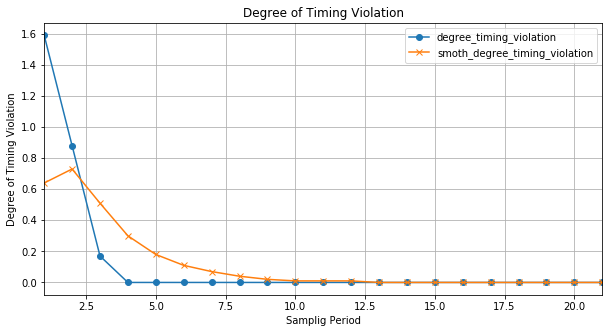

In [127]:
pp.figure(figsize=(10, 5))
#myplot=stats['degree_timing_violation'].plot(kind='line', style=plot_style)
#stats['smoth_degree_timing_violation'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['degree_timing_violation','smoth_degree_timing_violation'], kind='line', style=['o-','x-'],figsize=(10, 5), grid=True)
pp.title('Degree of Timing Violation')
pp.ylabel('Degree of Timing Violation')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

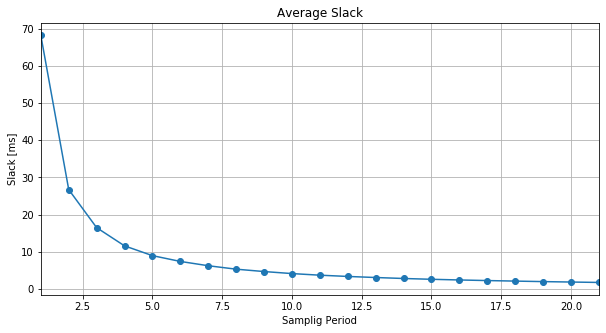

In [114]:
pp.figure(figsize=(10, 5))
stats['slack_duration'] = stats['slack'] / stats['count']
#myplot=stats['slack_duration'].plot(kind='line', style=plot_style, ylim=(0,200))
myplot=stats.plot('sample', ['slack_duration'], kind='line', style=plot_style, figsize=(10, 5), grid=True, legend=False)
pp.title('Average Slack')
pp.ylabel('Slack [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

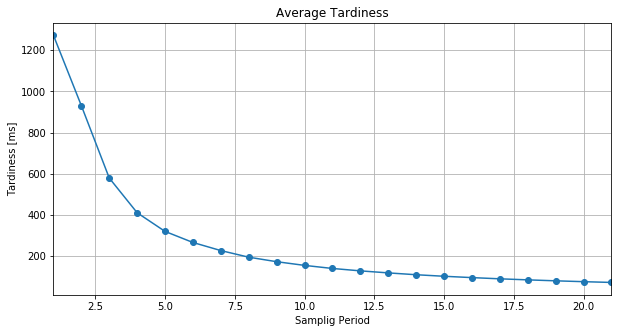

In [115]:

stats['delay_duration'] = stats['delay'] / stats['count']
#myplot=stats['delay_duration'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['delay_duration'], kind='line', style=plot_style, figsize=(10, 5), grid=True, legend=False)
pp.title('Average Tardiness')
pp.ylabel('Tardiness [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

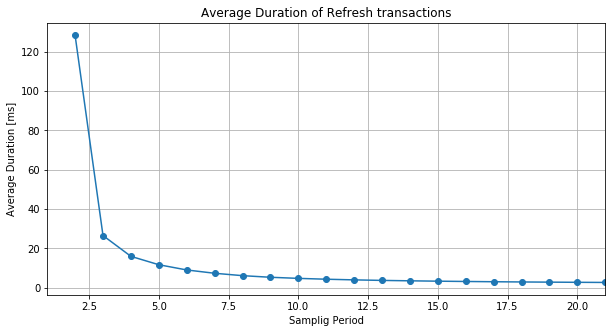

In [116]:
pp.figure(figsize=(10, 5))
stats['avg_update_duration'] = stats['update_duration']/stats['update_xacts']
#myplot=stats['avg_update_duration'].plot(kind='line', style=plot_style, ylim=(0,1000))
myplot=stats.plot('sample', ['avg_update_duration'], kind='line', style=plot_style, figsize=(10, 5), grid=True,legend=False)
pp.title('Average Duration of Refresh transactions')
pp.ylabel('Average Duration [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

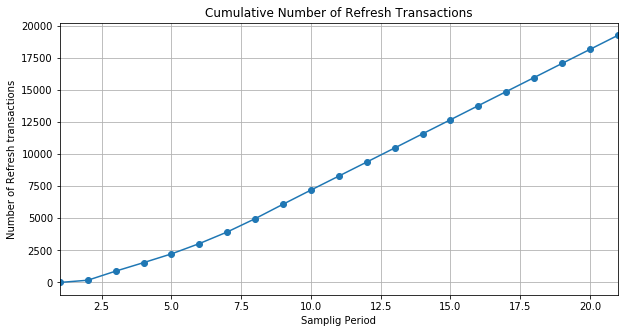

In [117]:
pp.figure(figsize=(10, 5))
#myplot=stats['update_xacts'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['update_xacts'], kind='line', style=plot_style,figsize=(10, 5), grid=True,legend=False)
pp.title('Cumulative Number of Refresh Transactions')
pp.ylabel('Number of Refresh Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

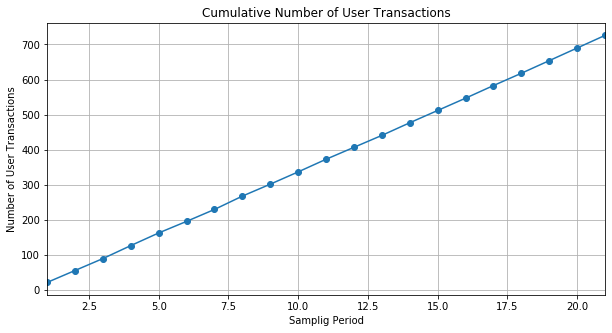

In [118]:
pp.figure(figsize=(10, 5))
#myplot=stats['count'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['count'], kind='line', style=plot_style,figsize=(10, 5), grid=True,legend=False)
pp.title('Cumulative Number of User Transactions')
pp.ylabel('Number of User Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

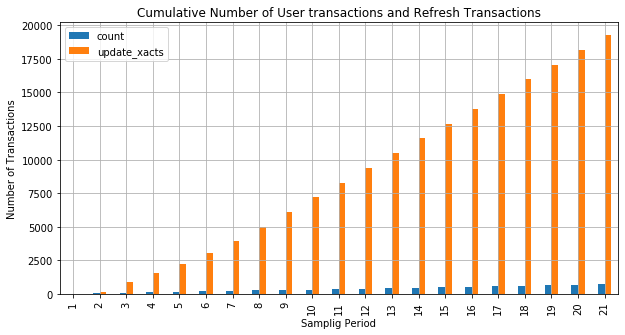

In [119]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['count','update_xacts'], kind='bar', figsize=(10, 5), grid=True,)
pp.title('Cumulative Number of User transactions and Refresh Transactions')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

In [22]:
stats['delta_update_xacts'] = stats['update_xacts'].diff()
stats['delta_user_xacts'] = stats['count'].diff()

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

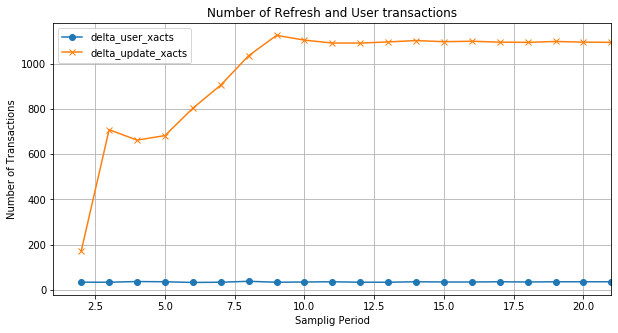

In [126]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['delta_user_xacts','delta_update_xacts'], kind='line',style=['o-','x-'], figsize=(10, 5),grid=True,)
pp.title('Number of Refresh and User transactions')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'samplig period')

<Figure size 720x360 with 0 Axes>

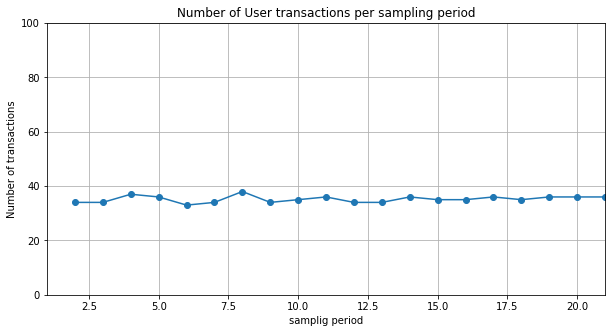

In [121]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['delta_user_xacts'], kind='line',style=plot_style, ylim=(0,100), figsize=(10, 5),grid=True,legend=False)
pp.title('Number of User transactions per sampling period')
pp.ylabel('Number of transactions')
pp.xlabel('samplig period')

Text(0.5, 0, 'Samplig Period')

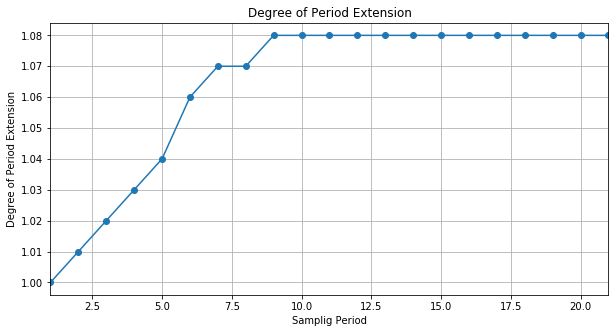

In [122]:
stats.plot('sample',  ['p_ext'], kind='line',style=plot_style, figsize=(10, 5),grid=True,legend=False)
pp.title('Degree of Period Extension')
pp.ylabel('Degree of Period Extension')
pp.xlabel('Samplig Period')

In [50]:
stats2 = pd.DataFrame({'tpm': stats['tpm'], 
                        'ttpm': stats['ttpm'],
                       'avg_response_time': stats['avg_response_time'],
                       'p_ext':stats['p_ext'], 
                       'smoth_degree_timing_violation': stats['smoth_degree_timing_violation']})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277351A5F48>],
      dtype=object)

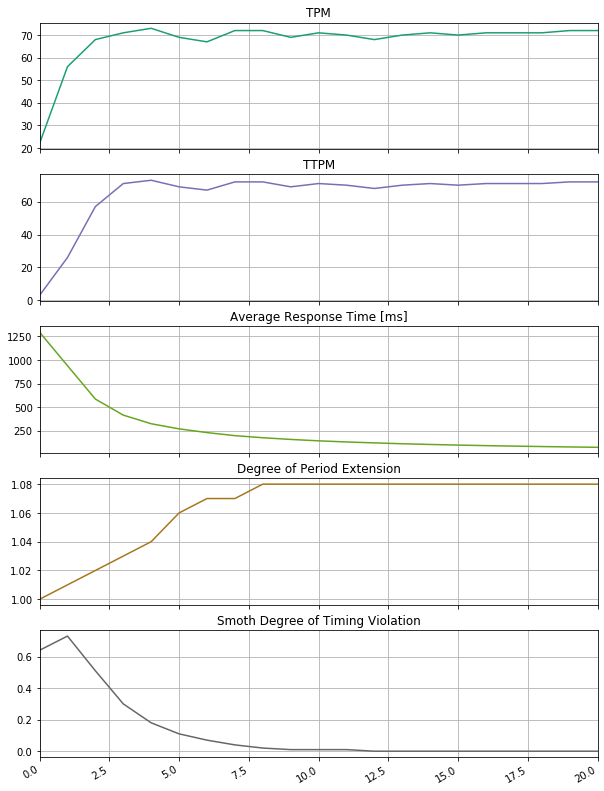

In [125]:
stats2.plot(kind = 'line',
            subplots=True, 
            layout = (5,1),

            figsize=(10, 15), 
            legend=False,
            title = ['TPM',
                     'TTPM',
                     'Average Response Time [ms]',
                     'Degree of Period Extension',
                     'Smoth Degree of Timing Violation'],
             grid=True,
           colormap='Dark2')